# <font color='blue'>Teste Data Science</font>


In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.5


## Objetivo
O Objetivo é construir um modelo preditivo para a varável "PRICE".

## Importando módulos e blibliotecas necessárias.
Dataset provido pela AirBnb

In [2]:
# Importando os módulos
import pandas as pd      
import matplotlib as mat
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
import colorsys
plt.style.use('seaborn-talk')  
import numpy as np                
%matplotlib inline             

In [3]:
pd.__version__

'1.1.3'

In [4]:
mat.__version__

'3.3.2'

In [5]:
# Carregando o dataset
df = pd.read_csv("listings.csv")   

In [6]:
# Verificando o formato dos dados
df.shape

(26615, 74)

In [7]:
# Verificando as primeiras linhas do dataset
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210222161029,2021-02-23,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,10.0,10.0,9.0,NaN,t,1,1,0,0,2.01
1,24480,https://www.airbnb.com/rooms/24480,20210222161029,2021-02-23,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.67
2,25026,https://www.airbnb.com/rooms/25026,20210222161029,2021-02-23,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,...,10.0,10.0,9.0,NaN,f,11,11,0,0,1.82
3,35636,https://www.airbnb.com/rooms/35636,20210222161029,2021-02-24,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,10.0,10.0,9.0,NaN,f,1,1,0,0,2.02
4,35764,https://www.airbnb.com/rooms/35764,20210222161029,2021-02-23,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,10.0,10.0,10.0,NaN,f,1,1,0,0,2.79


In [8]:
# Verificando as últimas linhas do dataset
df.tail(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
26610,48269503,https://www.airbnb.com/rooms/48269503,20210222161029,2021-02-24,Quarto inteiro no Recreio dos Bandeirantes.,NaN,NaN,https://a0.muscache.com/pictures/8d90763a-8aac...,389246322,https://www.airbnb.com/users/show/389246322,...,NaN,NaN,NaN,NaN,f,4,0,4,0,NaN
26611,48269534,https://www.airbnb.com/rooms/48269534,20210222161029,2021-02-24,"Casa grande mobiliada, 2 quartos em Jacarepaguá.",Nossa casa totalmente mobiliada está localizad...,Conheça um pouquinho da zona oeste do Rio de J...,https://a0.muscache.com/pictures/54e06fdd-b88b...,122122028,https://www.airbnb.com/users/show/122122028,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
26612,48270411,https://www.airbnb.com/rooms/48270411,20210222161029,2021-02-24,BR-RJ020 Casa Niemeyer vista deslumbrante,Uma vista deslumbrante de toda praia de são Co...,O bairro é muito bem localizado próximo à prai...,https://a0.muscache.com/pictures/8cc66765-57fd...,13773093,https://www.airbnb.com/users/show/13773093,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
26613,48270514,https://www.airbnb.com/rooms/48270514,20210222161029,2021-02-24,Casa Tijuca - Curtir e aproveitar o Rio,Nossa casa é nosso cantinho quando estamos no ...,"A Tijuca é um bairro centenário e acolhedor, ...",https://a0.muscache.com/pictures/4c865b22-baca...,23737846,https://www.airbnb.com/users/show/23737846,...,NaN,NaN,NaN,NaN,f,3,1,2,0,NaN
26614,48276004,https://www.airbnb.com/rooms/48276004,20210222161029,2021-02-23,Rio Spot Homes D040,<b>Other things to note</b><br />Beautiful and...,NaN,https://a0.muscache.com/pictures/7e7a9798-5428...,13580277,https://www.airbnb.com/users/show/13580277,...,NaN,NaN,NaN,NaN,t,59,58,0,0,NaN


In [9]:
#Listando as colunas do Dataset
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [10]:
# Copiando o Dataset para um novo com as colunas interessantes para o calculo da variável PRICE
df1 = df[['room_type', 'accommodates', 'bedrooms', 'beds', 'price']]

In [11]:
# 
df1.head()

,room_type,accommodates,bedrooms,beds,price
0,Entire home/apt,5,2.0,2.0,$221.00
1,Entire home/apt,2,1.0,1.0,$307.00
2,Entire home/apt,2,1.0,2.0,$160.00
3,Entire home/apt,2,1.0,1.0,$273.00
4,Entire home/apt,2,1.0,1.0,$135.00


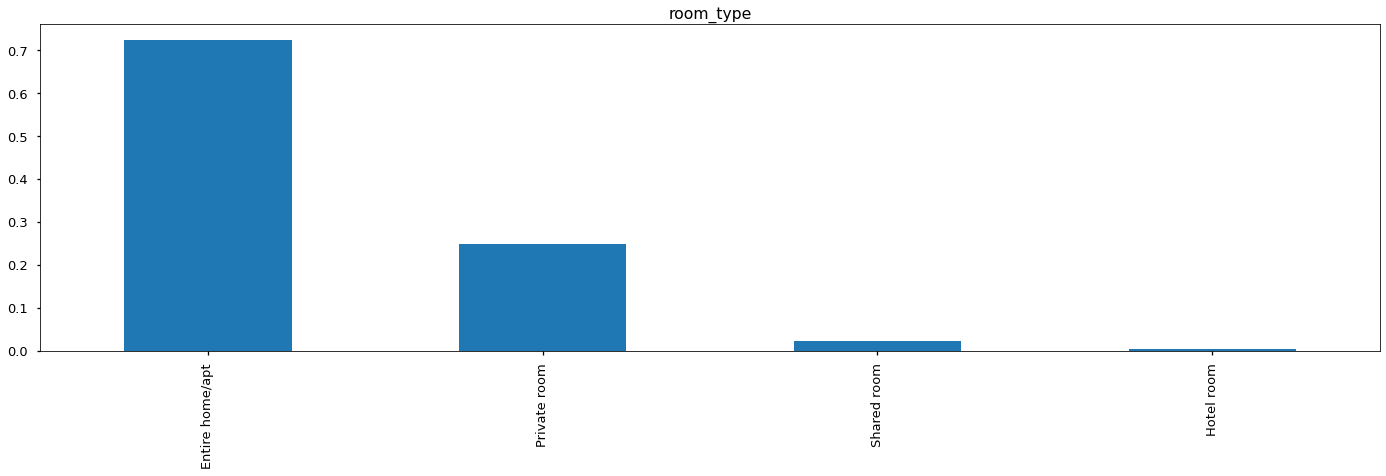

In [12]:
df1['room_type'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'room_type');
#plt.show()

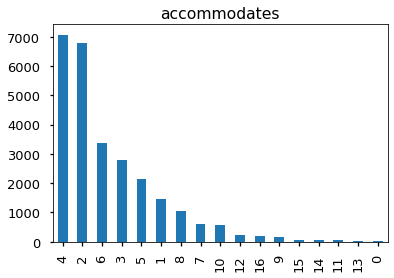

In [13]:
df1[str('accommodates')].value_counts().plot.bar(title= 'accommodates'); 


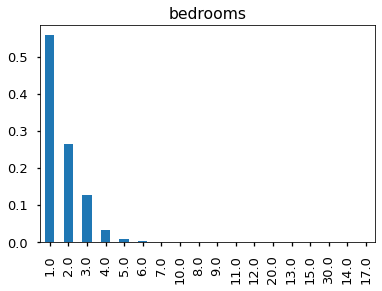

In [14]:
df1['bedrooms'].value_counts(normalize=True).plot.bar(title= 'bedrooms'); 


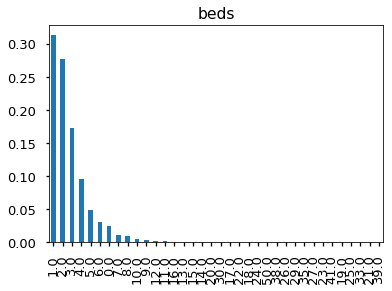

In [15]:

df1[str('beds')].value_counts(normalize=True).plot.bar(title= 'beds');


In [16]:
### Trocando valores da variável ordinal por números
df1['room_type'].replace('Entire home/apt', 1,inplace=True)
df1['room_type'].replace('Private room', 2,inplace=True)
df1['room_type'].replace('Shared room', 3,inplace=True)
df1['room_type'].replace('Hotel room', 4,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [17]:
df1['price']=df1['price'].str.slice(1) # Retira cifrão
df1['price']=df1['price'].str.replace(',', '').astype(float) # Retira vírgulas e converte



<ipython-input-17-24c4acae7684>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price']=df1['price'].str.slice(1) # Retira cifrão
<ipython-input-17-24c4acae7684>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price']=df1['price'].str.replace(',', '').astype(float) # Retira vírgulas e converte


In [18]:
df1.head()

,room_type,accommodates,bedrooms,beds,price
0,1,5,2.0,2.0,221.0
1,1,2,1.0,1.0,307.0
2,1,2,1.0,2.0,160.0
3,1,2,1.0,1.0,273.0
4,1,2,1.0,1.0,135.0


In [19]:
# Verificando se existem valores nulos
df1.isnull().sum()

room_type          0
accommodates       0
bedrooms        1746
beds             252
price              0
dtype: int64

In [20]:
# Eliminando valores nulos
df1.dropna(inplace=True)

<ipython-input-20-f0af4194b4c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [21]:
df1.isnull().sum()

room_type       0
accommodates    0
bedrooms        0
beds            0
price           0
dtype: int64

In [22]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df1, size=32):
    corr = df1.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

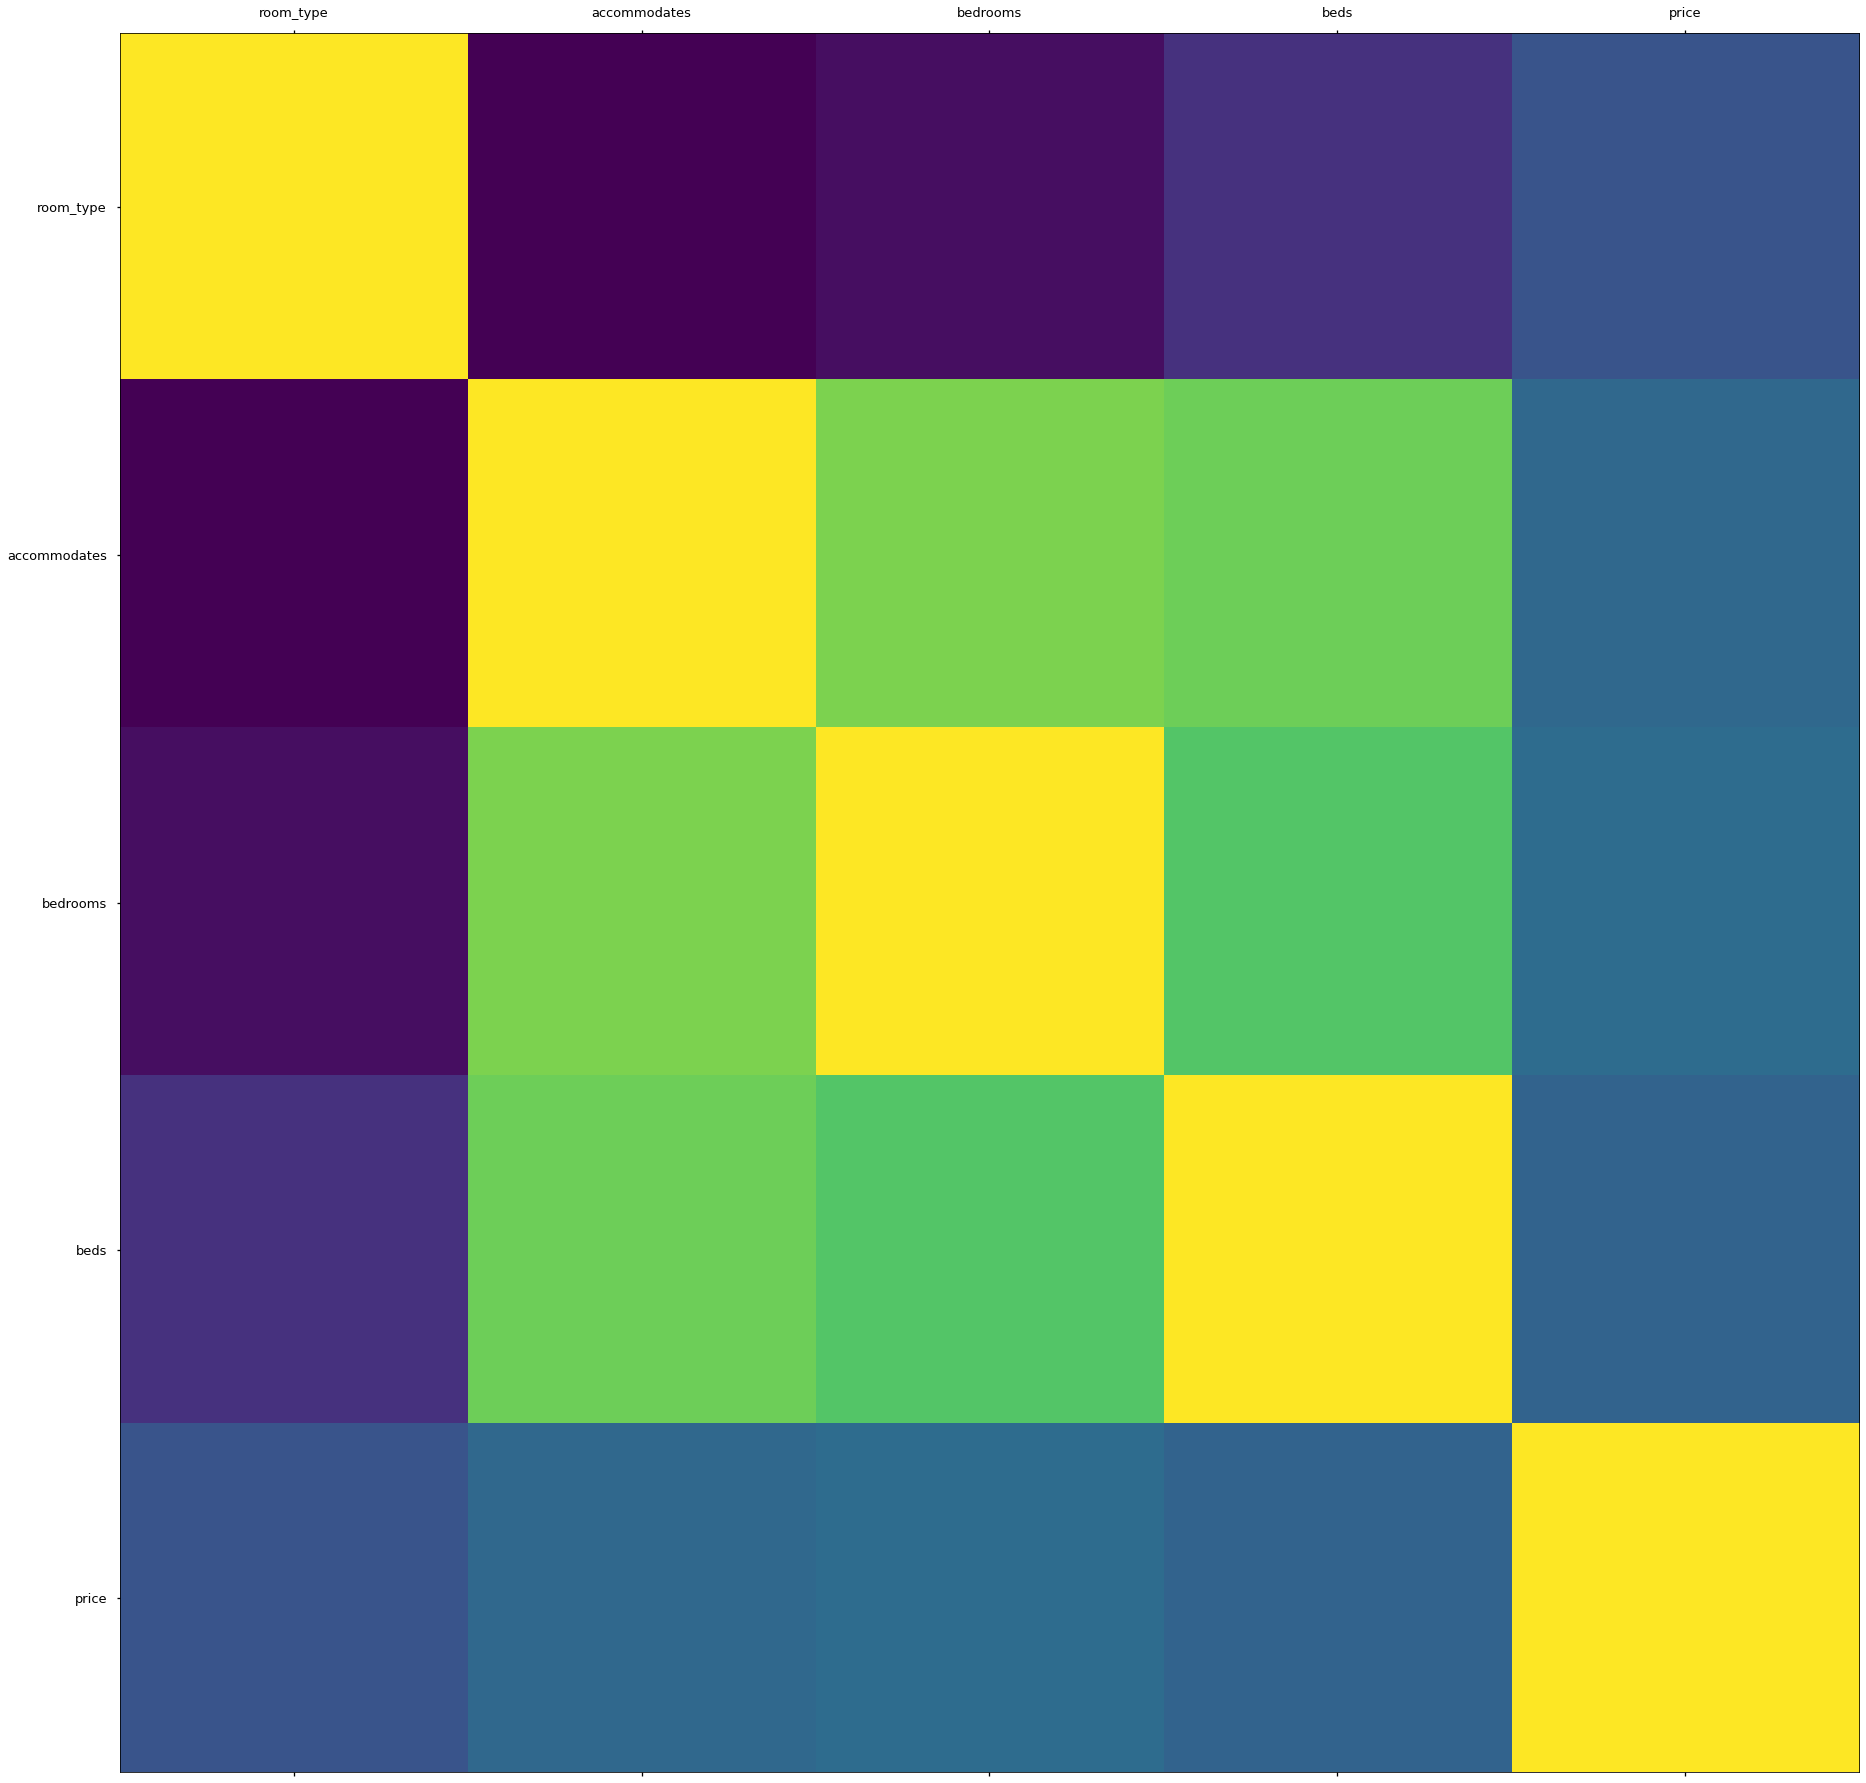

In [23]:
# Criando o gráfico
plot_corr(df1)


In [24]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
df1.corr()

,room_type,accommodates,bedrooms,beds,price
room_type,1.000000,-0.376157,-0.326200,-0.182478,-0.016896
accommodates,-0.376157,1.000000,0.727031,0.697226,0.089686
bedrooms,-0.326200,0.727031,1.000000,0.630020,0.107794
beds,-0.182478,0.697226,0.630020,1.000000,0.062054
price,-0.016896,0.089686,0.107794,0.062054,1.000000


In [25]:
# Verificando se existem valores nulos
df1.isnull().sum()

room_type       0
accommodates    0
bedrooms        0
beds            0
price           0
dtype: int64

## Spliting

70% para dados de treino e 30% para dados de teste

In [26]:
import sklearn as sk
sk.__version__

'0.23.2'

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['room_type', 'accommodates', 'bedrooms', 'beds', 'room_type', 'accommodates', 'bedrooms', 'beds']

In [29]:
# Variável a ser prevista
atrib_prev = ['price']

In [30]:
# Criando objetos
X = df1[atributos].values
Y = df1[atrib_prev].values

In [31]:
X

array([[1., 5., 2., ..., 5., 2., 2.],
       [1., 2., 1., ..., 2., 1., 1.],
       [1., 2., 1., ..., 2., 1., 2.],
       ...,
       [1., 8., 4., ..., 8., 4., 4.],
       [1., 6., 3., ..., 6., 3., 4.],
       [1., 8., 2., ..., 8., 2., 4.]])

In [32]:
Y

array([[ 221.],
       [ 307.],
       [ 160.],
       ...,
       [2500.],
       [ 160.],
       [ 316.]])

In [33]:
# Definindo a taxa de split
split_test_size = 0.30

In [34]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [35]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df1.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df1.index)) * 100))

70.00% nos dados de treino
30.00% nos dados de teste


In [36]:
X_treino

array([[ 1.,  4.,  2., ...,  4.,  2.,  3.],
       [ 1.,  6.,  3., ...,  6.,  3.,  6.],
       [ 1.,  6.,  2., ...,  6.,  2.,  3.],
       ...,
       [ 1.,  4.,  1., ...,  4.,  1.,  1.],
       [ 1.,  5.,  2., ...,  5.,  2.,  5.],
       [ 1., 10.,  3., ..., 10.,  3.,  3.]])

## Valores Missing Ocultos



In [37]:
# Verificando se existem valores nulos
df1.isnull().values.any()

False

In [38]:
df1.head()

,room_type,accommodates,bedrooms,beds,price
0,1,5,2.0,2.0,221.0
1,1,2,1.0,1.0,307.0
2,1,2,1.0,2.0,160.0
3,1,2,1.0,1.0,273.0
4,1,2,1.0,1.0,135.0


## Construindo e treinando o modelo

In [39]:
# Utilizando um classificador de Regressão Linear
import pickle # Usarei para salvar os modelos

In [40]:
# Criando o modelo preditivo

from sklearn.linear_model import LinearRegression
modelo_v1 = LinearRegression()

In [41]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino)

LinearRegression()

In [42]:
# Predição
y_pred = modelo_v1.predict(X_treino)

In [43]:
# Avaliação
from sklearn.metrics import r2_score
print(r2_score(y_true=Y_treino, y_pred=y_pred))

0.023870206027693186


In [45]:
# Salvando modelo treinado
filename = 'modelo_treinado_v1.sav'
pickle.dump(modelo_v1, open(filename, 'wb'))

In [46]:
# Dados de teste
X_teste

array([[2., 2., 1., ..., 2., 1., 1.],
       [1., 4., 2., ..., 4., 2., 3.],
       [1., 2., 1., ..., 2., 1., 1.],
       ...,
       [1., 6., 3., ..., 6., 3., 6.],
       [1., 3., 1., ..., 3., 1., 3.],
       [2., 1., 1., ..., 1., 1., 1.]])

In [47]:
# Fazendo uma predição dos dados de teste
y_pred = modelo_v1.predict(X_teste)
y_pred[1]


array([817.57907683])

# Fim